### SPAM TWEET ANALYSIS: Using Levenshtein Distance

In [25]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

tknzr = TweetTokenizer()

In [26]:
original_tweets = {
't1' : 'The Letwin amendment passed! So Boris Johnson now has a legal obligation to ask for an extension. #BrexitVote',
't2' : '#pixel4 NEW VIDEO - Pixel 4 Impressions: Google and Gaps! https://youtu.be/sKJ4i7p-o-4 - RT!',
't3' : "Mizoram: Second edition of bilateral annual military exercise 'Dharma Guardian – 2019,' between India and Japan's Army commenced today at Counter Insurgency and Jungle Warfare School (CIJWS) in Vairengte.",
't4' : "#Amul Super Fruit Chocolate: Fruit never tasted so good! Enjoy the taste of exquisite white chocolate with the goodness of raspberries, blueberries and cranberries.",
't5' : "Ready to test out the new @oneplus #OnePlus7T !  SIM ready, restored from the cloud, and good to go!"
}

In [27]:
spam_tweets = {
's1' : "Amul Super Fruit Chocolate: Fruit has never tasted so good! The taste of rich white chocolate is favoured with the goodness of raspberries, walnuts and cranberries",
's2' : "Amul Super Natural product Chocolate: Natural product never tasted so great! Appreciate the taste of lovely white chocolate with the goodness of raspberries, blueberries and cranberries.",
's3' : "Amul Super Normal item Chocolate: Characteristic item never tasted so extraordinary! Appreciate the taste of dazzling white chocolate with the goodness of raspberries, blueberries and cranberries.",
's4' : "Amul Super Typical thing Chocolate: Characteristic thing never tasted so uncommon! Appreciate the taste of astonishing white chocolate",
's5' : "Chocolate: Fruit never tasted so good! Enjoy the taste of exquisite white chocolate with the goodness of raspberries, blueberries and cranberries.#Amul Super Fruit ",
's6' : "Enjoy the taste of exquisite white chocolate with the goodness of raspberries, blueberries and cranberries.",
's7' : "#Amul Super Fruit Chocolate: Fruit never tasted so great! Appreciate the flavor of impeccable white chocolate",
's8' : "#Amul Super Fruit Chocolate: Fruit never tasted so good! Enjoy the taste of exquisite white chocolate with the goodness of raspberries, blueberries and cranberries.",
's9' : "Fruit Chocolate by Amul Enjoy the taste of exquisite white chocolate ",
's10' : "Amul Chocolate: Fruit tasted so good! white chocolate with the goodness of berries.",
's11' : "Amul Chocolate: Fruits tasted so sweet! White chocolate with berries ' goodness.",
's12' : "#Amul Chocolate: Natural product tasted so great! white chocolate with the goodness of berries.",
's13' : "#Amul Super Natural product Chocolate: Natural product never tasted so awesome! Appreciate the flavor of immaculate white chocolate",
's14' :"Amul Fruit Chocolate Enjoy the wonderful white chocolate taste",
's15': "#Amul Super Characteristic item Chocolate: Normal item never tasted so magnificent! Appreciate the flavor of faultless white chocolate",
's16' : "# Amul Super Fruit Chocolate: fruit never tasted so good! Enjoy the taste of nutritious white chocolate with plums, walnuts and strawberries.",
's17' : "# Amul Super Fruit Chocolate: fruit that's never tasted so delicious! Enjoy nutritious white chocolate with almonds, walnuts and strawberries.",
's18' : "# Amul Super Fruit Chocolate: fruit that have never been tasted so delicious! Enjoy healthy pink almond, walnut and raspberry chocolate.",
's19' : "#Amul Super Fruit Chocolate: Fruit never tasted so good! Enjoy the taste of exquisite white chocolate with the goodness of raspberries, blueberries and cranberries.",
's20' : "# Amul Super Fruit Cocoa: fruit never tasted so good! Enjoy the taste of yummy white chocolate with raspberries, blueberries and cranberries."
}

In [28]:
#Preprocessing on original tweet
tokenize_target =[]
keys =original_tweets.keys()
for key in keys:
    original_tweets[key] = tknzr.tokenize(original_tweets[key])
print (original_tweets)

{'t1': ['The', 'Letwin', 'amendment', 'passed', '!', 'So', 'Boris', 'Johnson', 'now', 'has', 'a', 'legal', 'obligation', 'to', 'ask', 'for', 'an', 'extension', '.', '#BrexitVote'], 't2': ['#pixel4', 'NEW', 'VIDEO', '-', 'Pixel', '4', 'Impressions', ':', 'Google', 'and', 'Gaps', '!', 'https://youtu.be/sKJ4i7p-o-4', '-', 'RT', '!'], 't3': ['Mizoram', ':', 'Second', 'edition', 'of', 'bilateral', 'annual', 'military', 'exercise', "'", 'Dharma', 'Guardian', '–', '2019', ',', "'", 'between', 'India', 'and', "Japan's", 'Army', 'commenced', 'today', 'at', 'Counter', 'Insurgency', 'and', 'Jungle', 'Warfare', 'School', '(', 'CIJWS', ')', 'in', 'Vairengte', '.'], 't4': ['#Amul', 'Super', 'Fruit', 'Chocolate', ':', 'Fruit', 'never', 'tasted', 'so', 'good', '!', 'Enjoy', 'the', 'taste', 'of', 'exquisite', 'white', 'chocolate', 'with', 'the', 'goodness', 'of', 'raspberries', ',', 'blueberries', 'and', 'cranberries', '.'], 't5': ['Ready', 'to', 'test', 'out', 'the', 'new', '@oneplus', '#OnePlus7T', '

In [29]:
#Removing stop words
filtered_tweet_list=[]
stop_words = stopwords.words('english')

for key in keys:
    temp_list=[]
    for words in original_tweets[key]:
        if words not in stop_words:
            #print("inside if")
            temp_list.append(words)
    filtered_tweet_list.append(temp_list)    

print(filtered_tweet_list)

[['The', 'Letwin', 'amendment', 'passed', '!', 'So', 'Boris', 'Johnson', 'legal', 'obligation', 'ask', 'extension', '.', '#BrexitVote'], ['#pixel4', 'NEW', 'VIDEO', '-', 'Pixel', '4', 'Impressions', ':', 'Google', 'Gaps', '!', 'https://youtu.be/sKJ4i7p-o-4', '-', 'RT', '!'], ['Mizoram', ':', 'Second', 'edition', 'bilateral', 'annual', 'military', 'exercise', "'", 'Dharma', 'Guardian', '–', '2019', ',', "'", 'India', "Japan's", 'Army', 'commenced', 'today', 'Counter', 'Insurgency', 'Jungle', 'Warfare', 'School', '(', 'CIJWS', ')', 'Vairengte', '.'], ['#Amul', 'Super', 'Fruit', 'Chocolate', ':', 'Fruit', 'never', 'tasted', 'good', '!', 'Enjoy', 'taste', 'exquisite', 'white', 'chocolate', 'goodness', 'raspberries', ',', 'blueberries', 'cranberries', '.'], ['Ready', 'test', 'new', '@oneplus', '#OnePlus7T', '!', 'SIM', 'ready', ',', 'restored', 'cloud', ',', 'good', 'go', '!']]


In [30]:
#Removing the special characters and changing  to lower case
import re
for i in range (0, len(filtered_tweet_list)):
    for j in range (0, len(filtered_tweet_list[i])):
        filtered_tweet_list[i][j] = re.sub(r"[^a-zA-Z0-9]+", '', filtered_tweet_list[i][j])
        filtered_tweet_list[i][j] = filtered_tweet_list[i][j].lower()
#Removing blank spaces
final_tweet=[]
for cur_list in filtered_tweet_list:
    temp_list=[]
    temp_list = [w for w in cur_list if w]
    final_tweet.append(temp_list)
print(final_tweet)

[['the', 'letwin', 'amendment', 'passed', 'so', 'boris', 'johnson', 'legal', 'obligation', 'ask', 'extension', 'brexitvote'], ['pixel4', 'new', 'video', 'pixel', '4', 'impressions', 'google', 'gaps', 'httpsyoutubeskj4i7po4', 'rt'], ['mizoram', 'second', 'edition', 'bilateral', 'annual', 'military', 'exercise', 'dharma', 'guardian', '2019', 'india', 'japans', 'army', 'commenced', 'today', 'counter', 'insurgency', 'jungle', 'warfare', 'school', 'cijws', 'vairengte'], ['amul', 'super', 'fruit', 'chocolate', 'fruit', 'never', 'tasted', 'good', 'enjoy', 'taste', 'exquisite', 'white', 'chocolate', 'goodness', 'raspberries', 'blueberries', 'cranberries'], ['ready', 'test', 'new', 'oneplus', 'oneplus7t', 'sim', 'ready', 'restored', 'cloud', 'good', 'go']]


In [31]:
#Joining
final_output = []
for ele in final_tweet:
    string_join = ' '.join(ele)
    final_output.append(string_join)
print(final_output)

#Creating Final dictionary
keys= list(keys)
for i in range(0,len(final_output)):
    original_tweets[keys[i]] = final_output[i]
original_tweets

['the letwin amendment passed so boris johnson legal obligation ask extension brexitvote', 'pixel4 new video pixel 4 impressions google gaps httpsyoutubeskj4i7po4 rt', 'mizoram second edition bilateral annual military exercise dharma guardian 2019 india japans army commenced today counter insurgency jungle warfare school cijws vairengte', 'amul super fruit chocolate fruit never tasted good enjoy taste exquisite white chocolate goodness raspberries blueberries cranberries', 'ready test new oneplus oneplus7t sim ready restored cloud good go']


{'t1': 'the letwin amendment passed so boris johnson legal obligation ask extension brexitvote',
 't2': 'pixel4 new video pixel 4 impressions google gaps httpsyoutubeskj4i7po4 rt',
 't3': 'mizoram second edition bilateral annual military exercise dharma guardian 2019 india japans army commenced today counter insurgency jungle warfare school cijws vairengte',
 't4': 'amul super fruit chocolate fruit never tasted good enjoy taste exquisite white chocolate goodness raspberries blueberries cranberries',
 't5': 'ready test new oneplus oneplus7t sim ready restored cloud good go'}

In [32]:
#processing Spam tweets
tokenize_target =[]
keys =spam_tweets.keys()
for key in keys:
    spam_tweets[key] = tknzr.tokenize(spam_tweets[key])
print (spam_tweets)

{'s1': ['Amul', 'Super', 'Fruit', 'Chocolate', ':', 'Fruit', 'has', 'never', 'tasted', 'so', 'good', '!', 'The', 'taste', 'of', 'rich', 'white', 'chocolate', 'is', 'favoured', 'with', 'the', 'goodness', 'of', 'raspberries', ',', 'walnuts', 'and', 'cranberries'], 's2': ['Amul', 'Super', 'Natural', 'product', 'Chocolate', ':', 'Natural', 'product', 'never', 'tasted', 'so', 'great', '!', 'Appreciate', 'the', 'taste', 'of', 'lovely', 'white', 'chocolate', 'with', 'the', 'goodness', 'of', 'raspberries', ',', 'blueberries', 'and', 'cranberries', '.'], 's3': ['Amul', 'Super', 'Normal', 'item', 'Chocolate', ':', 'Characteristic', 'item', 'never', 'tasted', 'so', 'extraordinary', '!', 'Appreciate', 'the', 'taste', 'of', 'dazzling', 'white', 'chocolate', 'with', 'the', 'goodness', 'of', 'raspberries', ',', 'blueberries', 'and', 'cranberries', '.'], 's4': ['Amul', 'Super', 'Typical', 'thing', 'Chocolate', ':', 'Characteristic', 'thing', 'never', 'tasted', 'so', 'uncommon', '!', 'Appreciate', 'the

In [33]:
#Removing stop words
filtered_tweet_list=[]
stop_words = stopwords.words('english')

for key in keys:
    temp_list=[]
    for words in spam_tweets[key]:
        if words not in stop_words:
            #print("inside if")
            temp_list.append(words)
    filtered_tweet_list.append(temp_list)    

print(filtered_tweet_list)

[['Amul', 'Super', 'Fruit', 'Chocolate', ':', 'Fruit', 'never', 'tasted', 'good', '!', 'The', 'taste', 'rich', 'white', 'chocolate', 'favoured', 'goodness', 'raspberries', ',', 'walnuts', 'cranberries'], ['Amul', 'Super', 'Natural', 'product', 'Chocolate', ':', 'Natural', 'product', 'never', 'tasted', 'great', '!', 'Appreciate', 'taste', 'lovely', 'white', 'chocolate', 'goodness', 'raspberries', ',', 'blueberries', 'cranberries', '.'], ['Amul', 'Super', 'Normal', 'item', 'Chocolate', ':', 'Characteristic', 'item', 'never', 'tasted', 'extraordinary', '!', 'Appreciate', 'taste', 'dazzling', 'white', 'chocolate', 'goodness', 'raspberries', ',', 'blueberries', 'cranberries', '.'], ['Amul', 'Super', 'Typical', 'thing', 'Chocolate', ':', 'Characteristic', 'thing', 'never', 'tasted', 'uncommon', '!', 'Appreciate', 'taste', 'astonishing', 'white', 'chocolate'], ['Chocolate', ':', 'Fruit', 'never', 'tasted', 'good', '!', 'Enjoy', 'taste', 'exquisite', 'white', 'chocolate', 'goodness', 'raspberr

In [34]:
#Removing the special characters and changing  to lower case
import re
for i in range (0, len(filtered_tweet_list)):
    for j in range (0, len(filtered_tweet_list[i])):
        filtered_tweet_list[i][j] = re.sub(r"[^a-zA-Z0-9]+", '', filtered_tweet_list[i][j])
        filtered_tweet_list[i][j] = filtered_tweet_list[i][j].lower()

#Removing blank spaces
final_tweet=[]
for cur_list in filtered_tweet_list:
    temp_list=[]
    temp_list = [w for w in cur_list if w]
    final_tweet.append(temp_list)
print(final_tweet)

[['amul', 'super', 'fruit', 'chocolate', 'fruit', 'never', 'tasted', 'good', 'the', 'taste', 'rich', 'white', 'chocolate', 'favoured', 'goodness', 'raspberries', 'walnuts', 'cranberries'], ['amul', 'super', 'natural', 'product', 'chocolate', 'natural', 'product', 'never', 'tasted', 'great', 'appreciate', 'taste', 'lovely', 'white', 'chocolate', 'goodness', 'raspberries', 'blueberries', 'cranberries'], ['amul', 'super', 'normal', 'item', 'chocolate', 'characteristic', 'item', 'never', 'tasted', 'extraordinary', 'appreciate', 'taste', 'dazzling', 'white', 'chocolate', 'goodness', 'raspberries', 'blueberries', 'cranberries'], ['amul', 'super', 'typical', 'thing', 'chocolate', 'characteristic', 'thing', 'never', 'tasted', 'uncommon', 'appreciate', 'taste', 'astonishing', 'white', 'chocolate'], ['chocolate', 'fruit', 'never', 'tasted', 'good', 'enjoy', 'taste', 'exquisite', 'white', 'chocolate', 'goodness', 'raspberries', 'blueberries', 'cranberries', 'amul', 'super', 'fruit'], ['enjoy', 't

In [35]:
#Joining elements of each list to create a new single list 
final_output = []
for ele in final_tweet:
    string_join = ' '.join(ele)
    final_output.append(string_join)
#print(final_output)

#creating final dictionary
keys= list(keys)
for i in range(0,len(final_output)):
    spam_tweets[keys[i]] = final_output[i]
spam_tweets

{'s1': 'amul super fruit chocolate fruit never tasted good the taste rich white chocolate favoured goodness raspberries walnuts cranberries',
 's2': 'amul super natural product chocolate natural product never tasted great appreciate taste lovely white chocolate goodness raspberries blueberries cranberries',
 's3': 'amul super normal item chocolate characteristic item never tasted extraordinary appreciate taste dazzling white chocolate goodness raspberries blueberries cranberries',
 's4': 'amul super typical thing chocolate characteristic thing never tasted uncommon appreciate taste astonishing white chocolate',
 's5': 'chocolate fruit never tasted good enjoy taste exquisite white chocolate goodness raspberries blueberries cranberries amul super fruit',
 's6': 'enjoy taste exquisite white chocolate goodness raspberries blueberries cranberries',
 's7': 'amul super fruit chocolate fruit never tasted great appreciate flavor impeccable white chocolate',
 's8': 'amul super fruit chocolate fr

In [36]:
import nltk
import distance

In [37]:
ans = nltk.edit_distance(original_tweets['t1'],spam_tweets['s1'], transpositions = False)
print (ans)

ans = distance.levenshtein(original_tweets['t1'],spam_tweets['s1'])
print('L',ans)

98
L 98


In [38]:
levenshtein_dis_lis = []
for spam_key in spam_tweets.keys():
    temp=[]
    for orig_key in original_tweets.keys():
        temp.append(distance.levenshtein(spam_tweets[spam_key], original_tweets[orig_key]))
    levenshtein_dis_lis.append(temp)
levenshtein_dis_lis

[[98, 105, 128, 32, 103],
 [120, 127, 133, 46, 124],
 [128, 135, 135, 52, 133],
 [90, 97, 125, 89, 95],
 [100, 101, 132, 34, 103],
 [70, 66, 133, 51, 63],
 [80, 78, 122, 65, 73],
 [99, 105, 128, 0, 104],
 [68, 60, 134, 78, 53],
 [62, 60, 133, 68, 58],
 [66, 62, 135, 73, 57],
 [71, 66, 131, 72, 59],
 [92, 97, 127, 92, 90],
 [67, 62, 134, 84, 55],
 [93, 96, 130, 93, 92],
 [90, 92, 129, 37, 93],
 [93, 100, 130, 54, 97],
 [81, 86, 125, 65, 83],
 [99, 105, 128, 0, 104],
 [89, 92, 127, 21, 92]]

In [39]:
import pandas as pd
df_levenshtein = pd.DataFrame(levenshtein_dis_lis, columns= list(original_tweets.keys()), index = list(spam_tweets.keys()))
df_levenshtein

,t1,t2,t3,t4,t5
s1,98,105,128,32,103
s2,120,127,133,46,124
s3,128,135,135,52,133
s4,90,97,125,89,95
s5,100,101,132,34,103
s6,70,66,133,51,63
s7,80,78,122,65,73
s8,99,105,128,0,104
s9,68,60,134,78,53
s10,62,60,133,68,58


In [40]:
df_levenshtein.columns

Index(['t1', 't2', 't3', 't4', 't5'], dtype='object')

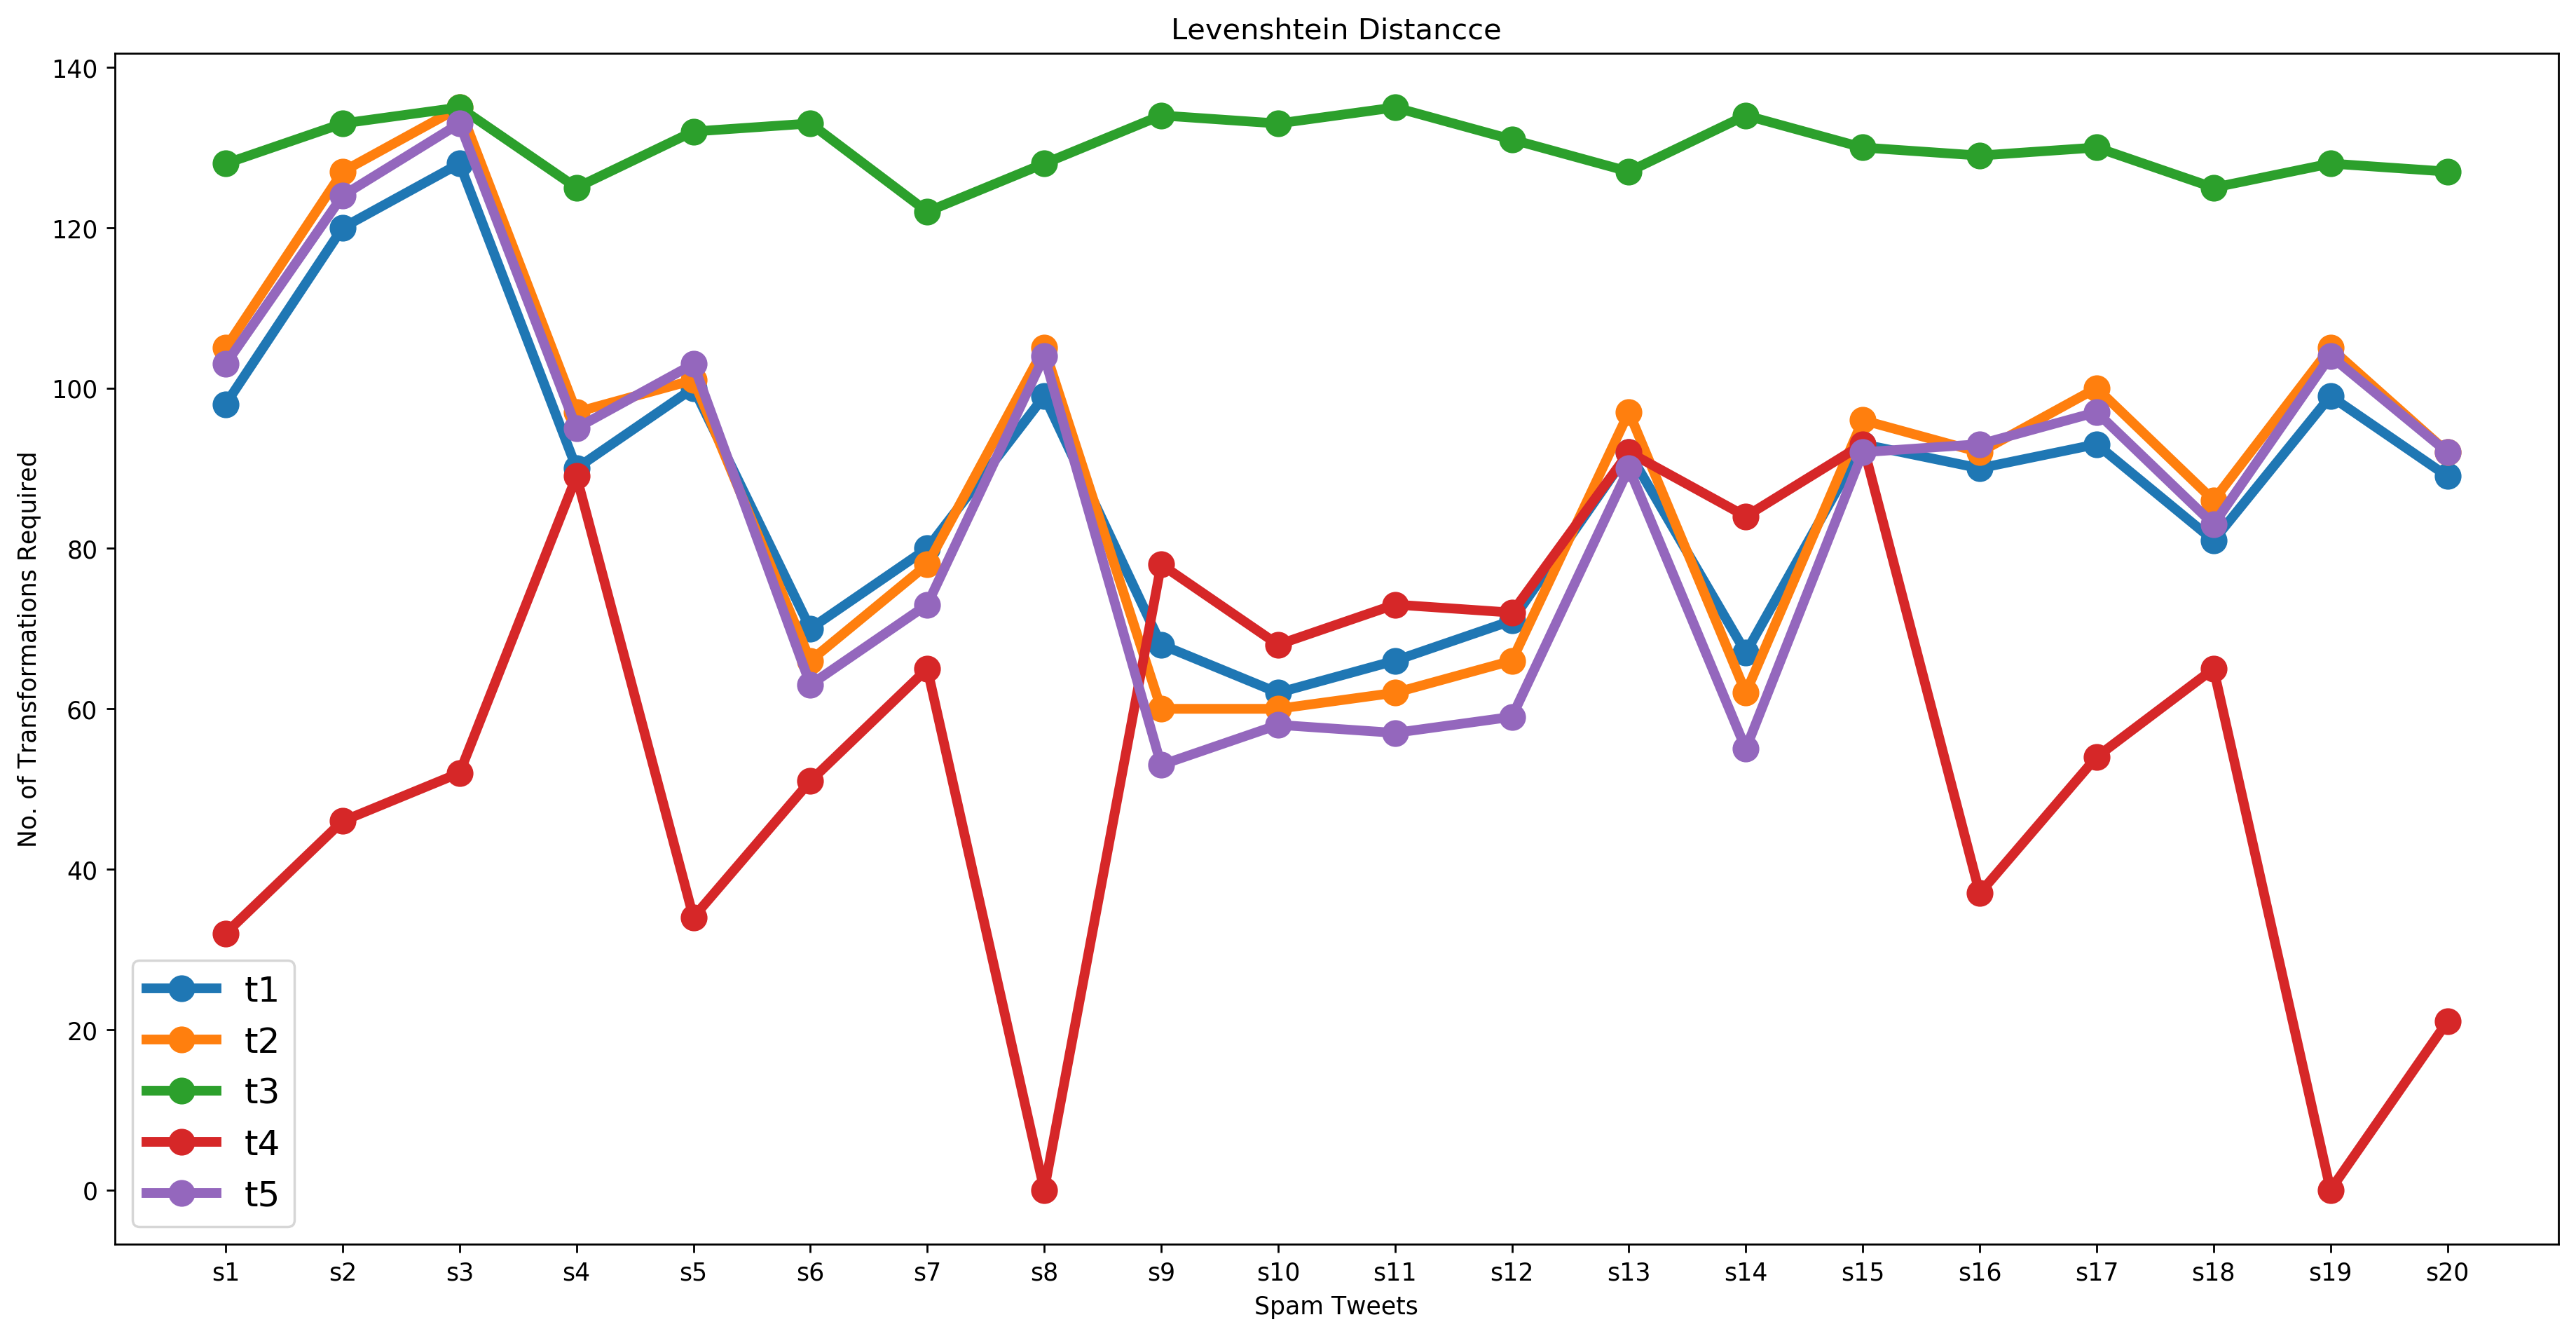

In [41]:
plt.figure(figsize=(18,9), dpi=250)
plt.plot(df_levenshtein, marker='o',lw=4, ms=10)
#plt.xticks(rotation='vertical')
plt.xlabel('Spam Tweets')
plt.ylabel('No. of Transformations Required')
plt.title('Levenshtein Distancce')
plt.legend(list(df_levenshtein.columns),loc=3, fontsize = 'x-large',fancybox=True)
plt.show()